### 1. Using `cv2`

#### 1.1. Loading image & convert ro RGB to display in matplotlib

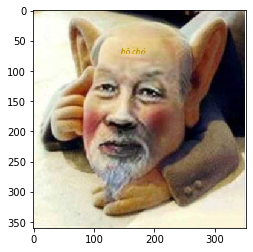

In [1]:
import cv2
import matplotlib.pyplot as plt

path = r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\hochicho.jpg"
img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#### 1.2. Shape of image

In [2]:
height, width,_ = img_bgr.shape 
width, height

(352, 360)

#### 1.3. perpectives with cv2.resize

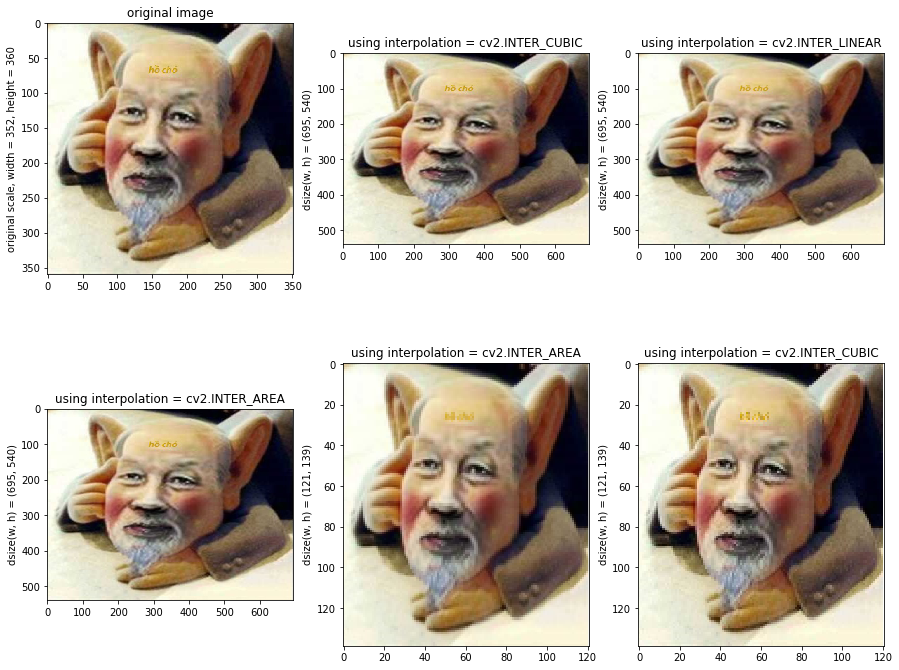

In [3]:
w1, w2, h1, h2= 695, 121, 540, 139 

res1_img = cv2.resize(img_rgb, dsize = (w1, h1), interpolation = cv2.INTER_CUBIC)
res2_img = cv2.resize(img_rgb, dsize = (w1, h1), interpolation = cv2.INTER_LINEAR)
res3_img = cv2.resize(img_rgb, dsize = (w1, h1), interpolation = cv2.INTER_AREA)
res4_img = cv2.resize(img_rgb, dsize = (w2, h2), interpolation = cv2.INTER_AREA)
res5_img = cv2.resize(img_rgb, dsize = (w2, h2), interpolation = cv2.INTER_CUBIC)

images = [img_rgb, res1_img, res2_img, res3_img, res4_img, res5_img]
titles = ['original image', 
          'using interpolation = cv2.INTER_CUBIC', 
          'using interpolation = cv2.INTER_LINEAR', 
          'using interpolation = cv2.INTER_AREA',
         'using interpolation = cv2.INTER_AREA',
         'using interpolation = cv2.INTER_CUBIC']
lab = ['original scale, width = '+str(width) + ', height = ' + str(height), 'dsize(w, h) = (%s, %s)'%(w1, h1), 
       'dsize(w, h) = (%s, %s)'%(w1, h1), 'dsize(w, h) = (%s, %s)'%(w1, h1), 
       'dsize(w, h) = (%s, %s)'%(w2, h2), 'dsize(w, h) = (%s, %s)'%(w2, h2)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 12))
ax = axes.ravel()
for k in range(6):
    ax[k].imshow(images[k])
    ax[k].set_title(titles[k])
    ax[k].set_ylabel(lab[k])

### 2. Using `scikit.image`

#### 2.1. Using the `available image_data`

image_shape =  (512, 512)


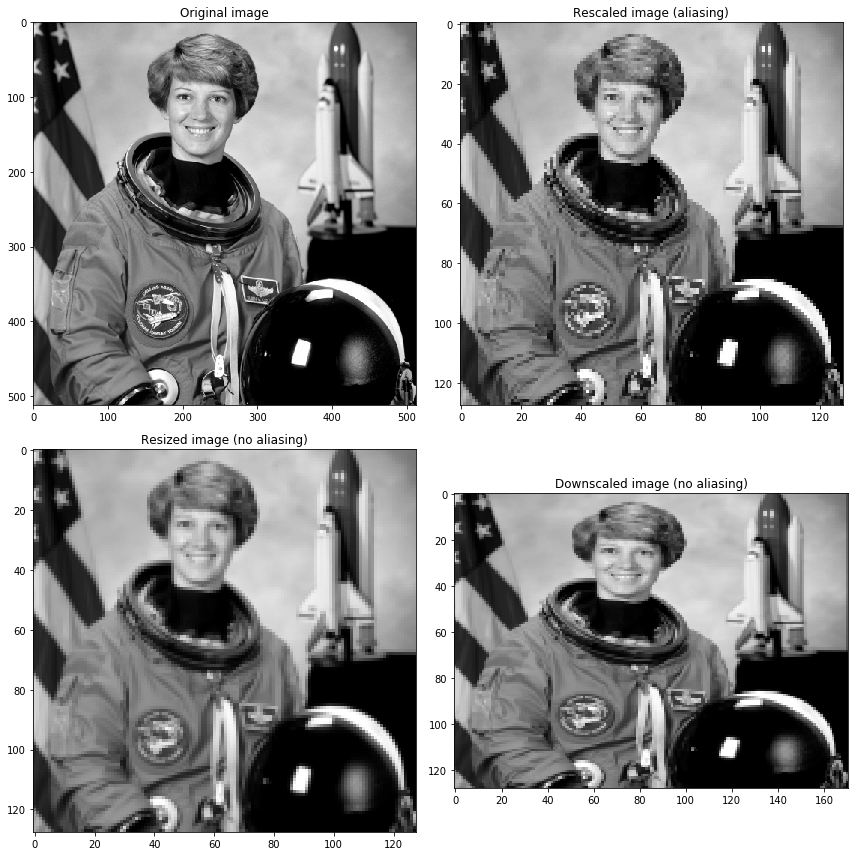

In [4]:
import skimage
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())
print('image_shape = ', image.shape)
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 12))

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

#### 2.2. Loading image from your `word_dir`

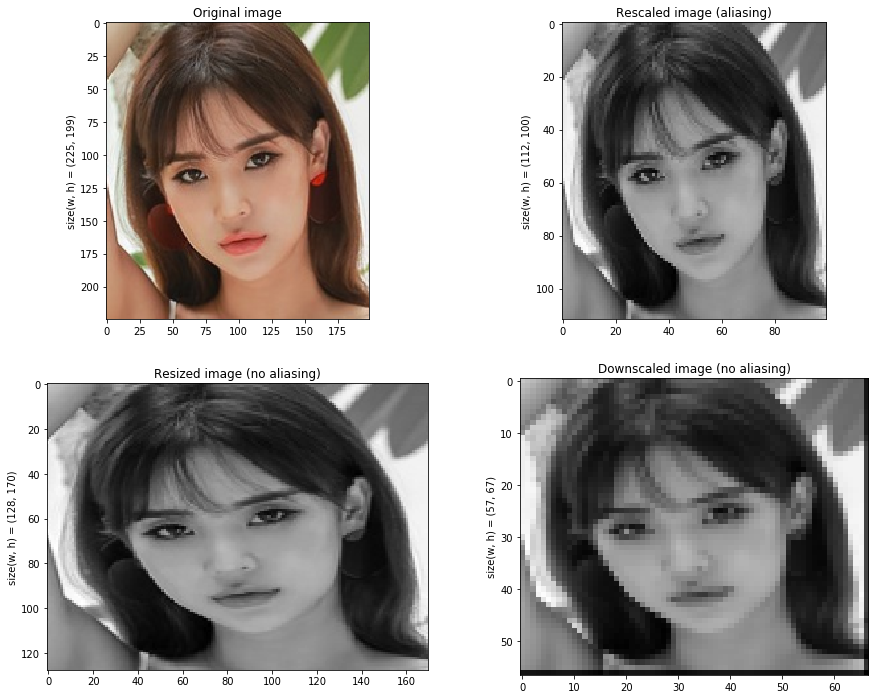

In [5]:
from skimage import io

path2 = r"D:\Faces\girl_face\place_holder\469.PNG"
org_img = io.imread(path2)
if org_img.shape[-1] == 4:
    ## original_chanel = RGBA
    gray_img = color.rgb2gray(color.rgba2rgb(org_img))
else:
    ## org_chanel = RGB
    gray_img = org_img
image_rescaled = rescale(gray_img, 0.5, anti_aliasing=False)
image_resized = resize(gray_img, (image.shape[0] // 4, image.shape[1] // 3),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(gray_img, (4, 3))

images = [org_img, image_rescaled, image_resized, image_downscaled]
titles = ['Original image', 'Rescaled image (aliasing)',
          'Resized image (no aliasing)', 'Downscaled image (no aliasing)']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 12))
ax = axes.ravel()
for k in range(4):
    ax[k].imshow(images[k], cmap = 'gray')
    ax[k].set_title(titles[k])
    ax[k].set_ylabel('size(w, h) = (%s, %s)'%(images[k].shape[0:2]))

### 3. Using `PIL`

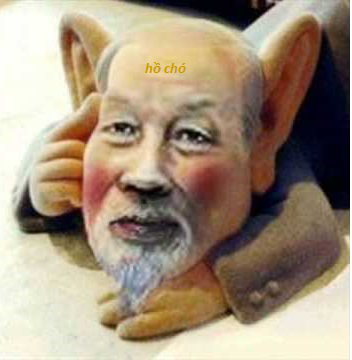

In [6]:
import PIL
from PIL import Image
img = Image.open(path)
img

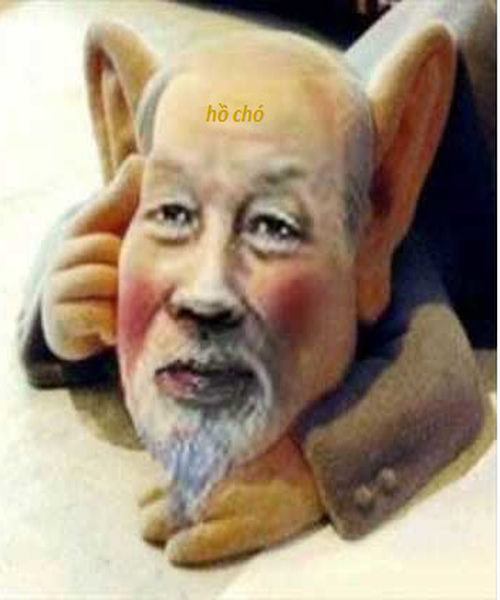

In [7]:
new_width  = 500
new_height = 600
PIL_res_img = img.resize((new_width, new_height), Image.ANTIALIAS)
PIL_res_img